In [1]:
import pandas as pd
import matplotlib as mpl

In [2]:
entregas = pd.read_csv('entregas.csv')

In [3]:
entregas.head()

,Produto,dia-da-semana,hora-do-pedido,tempo-entrega,tempo-entrega-real
0,A,1,8,15,15
1,A,6,17,15,60
2,B,6,14,30,30
3,A,1,14,45,15
4,B,2,1,60,75


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001633142CD48>]],
      dtype=object)

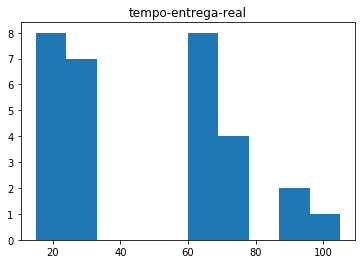

In [4]:
#1 -  Construa o histograma da variável aleatória tempo-entrega-real

entregas.hist(column='tempo-entrega-real', grid=False)

In [5]:
entregas = entregas.rename(columns={'Produto ' : 'Produto', 'dia-da-semana' : 'DiaDaSemana', 'hora-do-pedido' : 'HoraDoPedido', 'tempo-entrega' : 'TempoEntrega', 'tempo-entrega-real' : 'TempoEntregaReal'})

In [6]:
#2 - Qual a probabilidade de uma entrega ocorrer em 15 minutos

count15mins = entregas.loc[entregas.TempoEntrega == 15, 'TempoEntrega'].count()
countTotalEntregas = entregas.TempoEntrega.count()

print('A probabilidade de uma entrega demorar 15 minutos é de ', round((count15mins / countTotalEntregas) * 100, 2), '%', 'ou', count15mins, '/', countTotalEntregas)

A probabilidade de uma entrega demorar 15 minutos é de  26.67 % ou 8 / 30


In [7]:
#3 - Qual a probabilidade do produto D ser entregue em 30 minutos

df30minsProdutoD = entregas.query('TempoEntrega == 30').query('Produto == "D"')

countProdutoD = entregas.query('Produto == "D"').Produto.count()
countProdutoD30mins = df30minsProdutoD.Produto.count()

print('A probabilidade de uma entrega do produto D demorar 30 minutos é de ', round((countProdutoD30mins / countProdutoD) * 100, 2), '%', 'ou', countProdutoD30mins, '/', countProdutoD)

A probabilidade de uma entrega do produto D demorar 30 minutos é de  37.5 % ou 3 / 8


In [8]:
#4 - Qual a esperança de entrega do produto A

countProdutoA = entregas.query('Produto == "A"').TempoEntregaReal.count()
dfProdutoA = entregas.query('Produto == "A"')

probTempoEntregaReal15 = dfProdutoA.query('TempoEntregaReal == 15').TempoEntregaReal.count()/countProdutoA
probTempoEntregaReal30 = dfProdutoA.query('TempoEntregaReal == 30').TempoEntregaReal.count()/countProdutoA
probTempoEntregaReal60 = dfProdutoA.query('TempoEntregaReal == 60').TempoEntregaReal.count()/countProdutoA

esperancaEntregaProdutoA = (probTempoEntregaReal15 * 15) + (probTempoEntregaReal30 * 30) + (probTempoEntregaReal60 * 60) 

print('A esperança de entrega do produto A é', esperancaEntregaProdutoA)

A esperança de entrega do produto A é 36.0


In [9]:
#5 - Qual a esperança de tempo de entrega

countTempoEntrega = entregas.TempoEntrega.count()

probTempoEntrega15 = entregas.query('TempoEntrega == 15').TempoEntrega.count() / countTempoEntrega
probTempoEntrega30 = entregas.query('TempoEntrega == 30').TempoEntrega.count() / countTempoEntrega
probTempoEntrega45 = entregas.query('TempoEntrega == 45').TempoEntrega.count() / countTempoEntrega
probTempoEntrega60 = entregas.query('TempoEntrega == 60').TempoEntrega.count() / countTempoEntrega
probTempoEntrega75 = entregas.query('TempoEntrega == 75').TempoEntrega.count() / countTempoEntrega
probTempoEntrega90 = entregas.query('TempoEntrega == 90').TempoEntrega.count() / countTempoEntrega
probTempoEntrega105 = entregas.query('TempoEntrega == 105').TempoEntrega.count() / countTempoEntrega

esperancaTempoEntrega = (probTempoEntrega15 * 15) + (probTempoEntrega30 * 30) + (probTempoEntrega45 * 30) + (probTempoEntrega60 * 60) + (probTempoEntrega75 * 75) + (probTempoEntrega90 * 90) + (probTempoEntrega105 * 105)

print('A esperança do tempo de entrega é', esperancaTempoEntrega)

A esperança do tempo de entrega é 44.5
